## K-Means Clustering

The purpose of this project is to implement an example of 2D k-means clustering using scikit-learn and assess the performance of the clustering with the elbow method and silhouette coefficient to show the most appropriate number of clusters.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

For this example of k-means clustering, I will be using a set of randomly generated data points for clustering, using the make_blobs function from the sklearn.datasets module. 

I will be using 1000 random datapoints organised into four clusters.

In [19]:
x_y, labels= make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=1,
    random_state=1)

In [20]:
data = pd.DataFrame(x_y)
true_labels=pd.Series(labels)

The make_blobs function returns a 2D numpy array of the x any y values of the randomly generated dataset, and a 1d array of the true lables of the clustering for later comparison.
The graph below shows the randomly generated data points in a scatter plot.

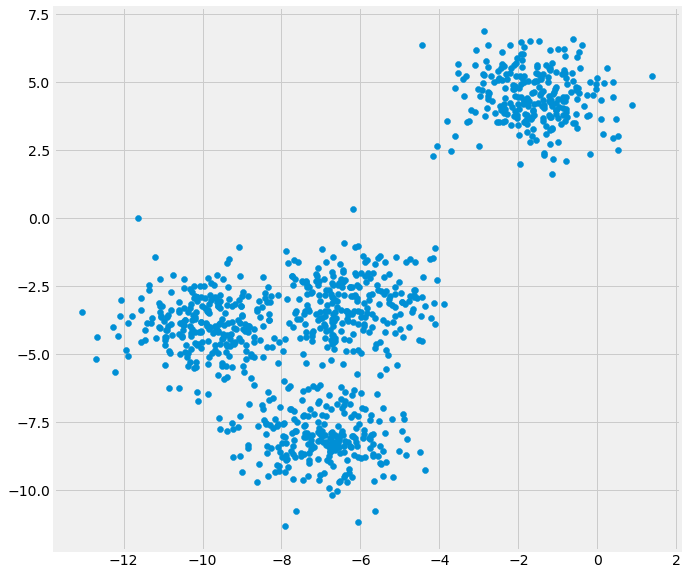

In [21]:
plt.figure(figsize=(10, 10))
plt.style.use('fivethirtyeight')
plt.scatter(data[0], data[1])

As we can see from the plot above, the x values range from around -4 to 4, and the y-values range form around -2 to 10.
It is an important preprocessing step when performing a k-means clustering analysis to normalise the data to have the same mean and varaiance along each axis to prevent the algorithm considering one variable more important than another.
StandardScaler from the sklearn.preprocessing module preprocesses the data by removing the mean and setting the standard deviation to 1.

In [22]:
scaler=StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data))

Below, we can see the same data with a mean of 0 and SD of 1.

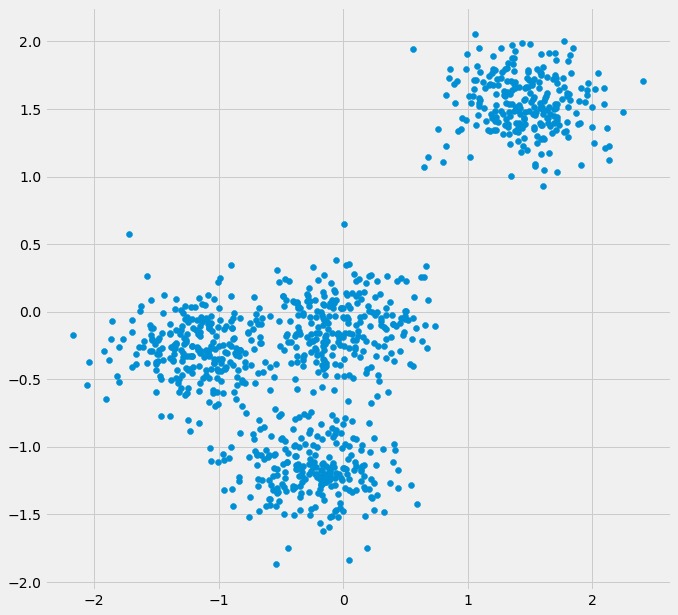

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(scaled_data[0], scaled_data[1])

The data is now ready for clustering with the KMeans class from scikitlearn.cluster module.
I am initiaiting an instance of the KMeans class with the random initiation technique, whereby the  centroids of the clustering algorithm will initially be placed randomly, 4 clusters to correspond to the 4 centers used when generating the dataset, and an iteration limit of 200 times per initialization, and 20 initializations.
After running the algorithm, the attributes of the kmeans okbejct will be those of the algorithm initialization that returned the lowest SSE.

In [24]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=20,
    max_iter=200,
    random_state=42)

Now, the data can be fit with only one line of code.

In [25]:
kmeans.fit(scaled_data)

KMeans(init='random', max_iter=200, n_clusters=4, n_init=20, random_state=42)

Statistics from the kmeans objext can be accessed as attributes of the object:<br>
* SSE - .inertia_
* centroid positions - .cluster_centers_
* iterations to converge - .n_iter_
* assigned clusters - .labels_

In [26]:
kmeans.inertia_

144.08863116546522

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1
0,1.457503,1.539786
1,-0.000971,-0.107521
2,-1.173361,-0.275506
3,-0.242062,-1.175674


In [28]:
kmeans.n_iter_

7

Now, we can view the results of the clustering by adding the labels to the initial data, and plotting the clusters.

In [44]:
scaled_data['cluster']= kmeans.labels_
c0 = scaled_data[scaled_data.cluster == 0]
c1 = scaled_data[scaled_data.cluster == 1]
c2 = scaled_data[scaled_data.cluster == 2]
c3 = scaled_data[scaled_data.cluster == 3]

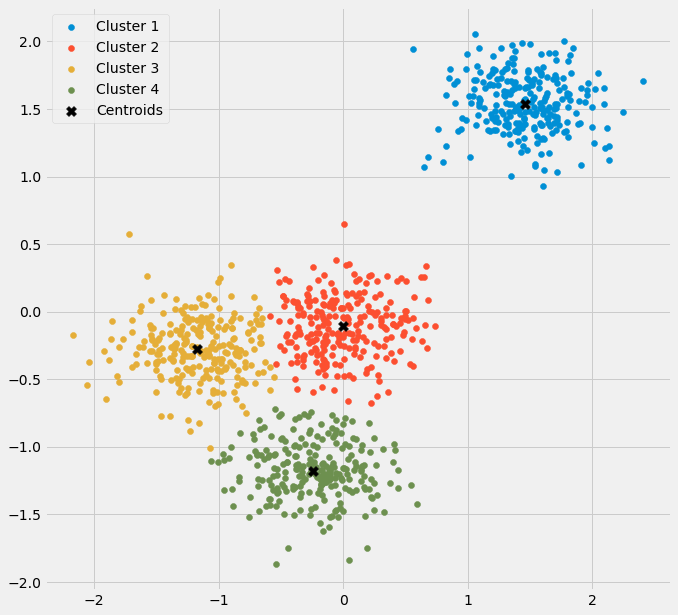

In [45]:
plt.figure(figsize=(10, 10))
plt.scatter(c0[0], c0[1], label='Cluster 1')
plt.scatter(c1[0], c1[1], label='Cluster 2')
plt.scatter(c2[0], c2[1], label='Cluster 3')
plt.scatter(c3[0], c3[1], label='Cluster 4')
plt.scatter(centroids[0], centroids[1], c='black', marker='X', s=100, label = 'Centroids')
plt.legend()

Isn't it pretty?

## Selecting the Best k

Four clusters were used in the KMeans object as that's the number of clusters that was used to randomly generate the dataset. However, if this wasn't known I could run the k-means clustering muliple times, and use evaluation methods to determine the most appropriate number of clusters.

Two commonly used means are the elbow curve and the silhouette coefficient.

To apply the elbow curve method, run the k-means algorithm mulltiple times with a varying number of clusters, and record the SSE for each.
When plotting the SSE for each value of K, with some luck a point on the curve will clearly show a sharp change in gradient, indicating the knee(/elbow) point at the most appropriate value of k with a reasonable balance between SSE and number of clusters. 

In [58]:
kmeans_kwargs={ # Storing the parameters for convenience and prettier code
    'init':'random',
    'n_init':20,
    'max_iter':200,
    'random_state':42}

sse=[]
for clusters in range(1,11):
    kmeans=KMeans(n_clusters=clusters, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

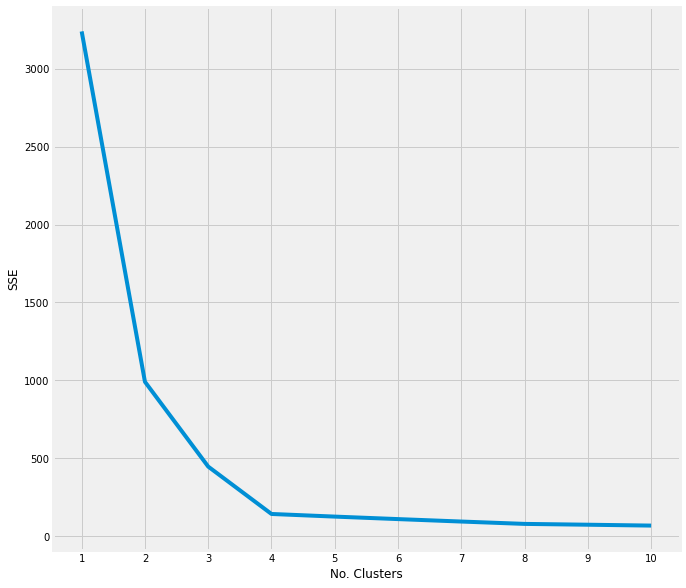

In [59]:
plt.figure(figsize=(10, 10))
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('No. Clusters')
plt.ylabel('SSE')


Here, we can see two obvious potential knee points on the curve at k=2 and k=4, the sharper of which appears at k=4, as expected.<br>
The sharp change in gradient at k=2 is not surprising when looking at the intial data set. Three of the clusters are relatively close together, and could easily have been grouped into a single large cluster if we were being less discerning.<br>

The silhouette score uses a value between 1 and -1 to describe the quality of fit of the clusters by comparing the distance of points from other points in the same cluster and points in other clusters, with scores closer to 1 indicating better clustering.<br>
Like the elbow curve, we run the clustering several times with varying k, and this time we calculate the silhouette coefficient with silhouette_score from the sklearn.metrics module.

In [63]:
silh_coef = []
for clusters in range(2,11):
    kmeans=KMeans(n_clusters=clusters, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    score=silhouette_score(scaled_data, kmeans.labels_)
    silh_coef.append(score)

In [64]:
silh_coef

[0.6476746524242009,
 0.6297378646409297,
 0.7295497763645614,
 0.6487439588398993,
 0.5668383583833536,
 0.48955541449985485,
 0.38312478943083633,
 0.3701133070712187,
 0.3594883862288526]

Text(0, 0.5, 'Silhouette Score')

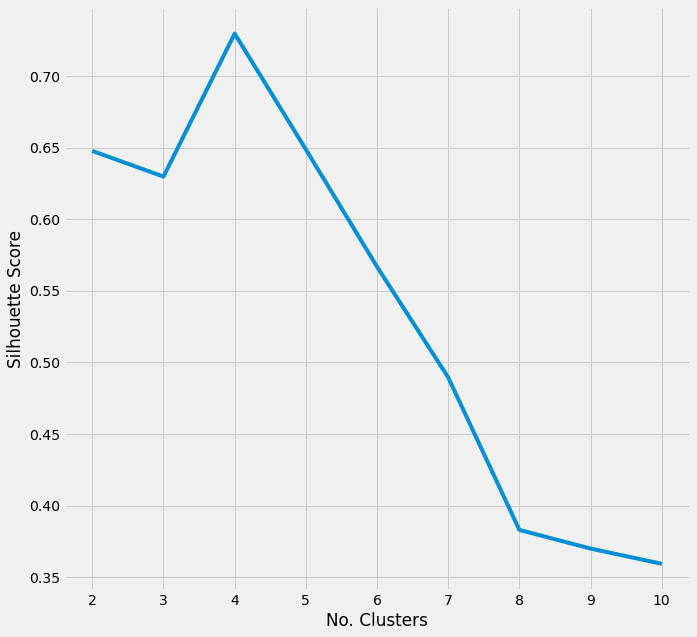

In [55]:
plt.figure(figsize=(10, 10))
plt.plot(range(2,11),silh_coef)
plt.xticks(range(2,11))
plt.xlabel('No. Clusters')
plt.ylabel('Silhouette Score')

The plot of silhouette coefficients clearly indicates that k=4 is the best number of clusters for this data set.